<a href="https://colab.research.google.com/github/VishanOberoi/ComputerVision/blob/main/Harris_Corner_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CV Lab 5

i033

Harris Corner Detector **bold text**

Task 1: Blur image


Task 2: Apply Harris corner detector. Use threshold = 0.5 and window size = 3x3


Task 3: show image with detected corners


Task 4: Change threshold and window size. Observe the changes


Task 5: Increase the size of window and illumination and repeat the same

In [15]:
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
from skimage import data
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

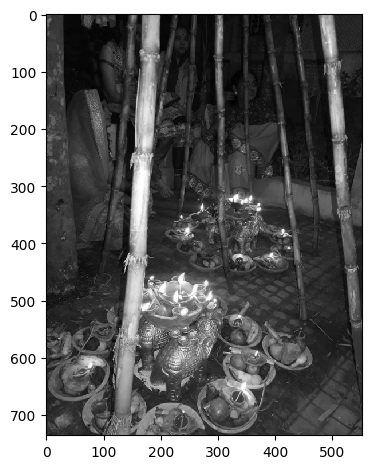

In [9]:
home = cv2.imread('/content/home.jpeg', cv2.IMREAD_GRAYSCALE)
corners = cv2.imread('/content/corners.png', cv2.IMREAD_GRAYSCALE)

imshow(home)

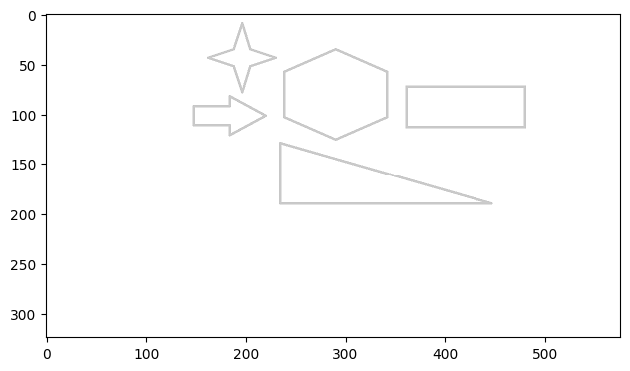

In [10]:
imshow(corners)

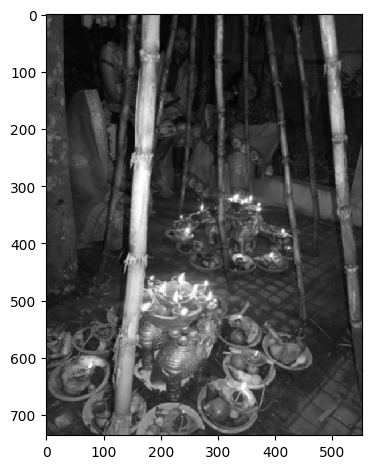

In [12]:
blurred_home = cv2.GaussianBlur(home,(3,3), 0)
blurred_corners = cv2.GaussianBlur(corners,(3,3), 0)
imshow(blurred_home)

In [55]:
I_x = cv2.Sobel(blurred_home, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(blurred_home, cv2.CV_64F, 0, 1, ksize=3)
I_x_squared = np.square(I_x)
I_y_squared = np.square(I_y)
I_x_I_y = I_x * I_y






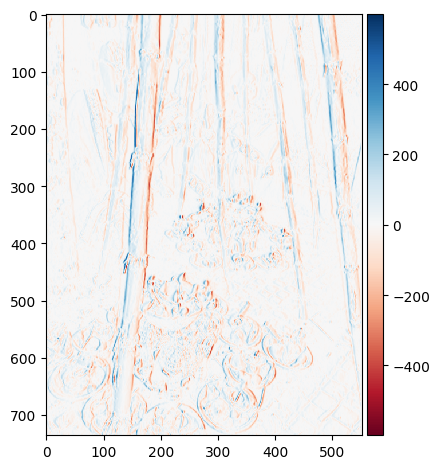

In [56]:
#We can see all the vertical edges
imshow(I_x)

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


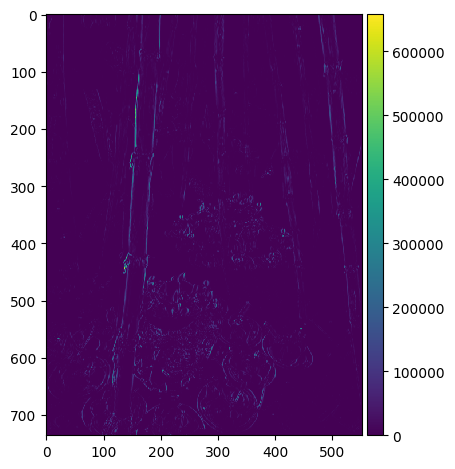

In [18]:
imshow(I_x_squared)

In [65]:
I_x = cv2.Sobel(blurred_home, cv2.CV_16S, 1, 0, ksize=3)
I_y = cv2.Sobel(blurred_home, cv2.CV_16S, 0, 1, ksize=3)
I_x_squared = np.square(I_x)
I_y_squared = np.square(I_y)
I_x_I_y = I_x * I_y

size = 3
start = int((size - 1) / 2)
k = 0.04
harris_response = np.zeros_like(home, dtype=np.float32)


for x in range(start, blurred_home.shape[1] - start):
  for y in range(start, blurred_home.shape[0] - start):
    I_x_square_sum = np.sum(I_x_squared[y - start: y + start, x - start : x + start])
    I_y_square_sum = np.sum(I_y_squared[y - start: y + start, x - start : x + start])
    I_xy_square_sum = np.sum(I_x_I_y[y - start: y + start, x - start : x + start])

    det = (I_x_square_sum * I_y_square_sum) - (I_xy_square_sum ** 2)
    trace = I_x_square_sum + I_y_square_sum

    R = det - [(k * (trace **2))]
    harris_response[y, x] = R



In [66]:
harris_response.max()

6744791600.0

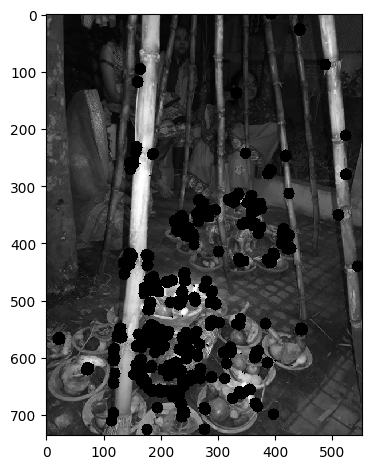

In [67]:
threshold = 0.5 * harris_response.max()
corner_points = np.where(harris_response > threshold)

corner_y, corner_x = corner_points

for i in range(len(corner_y)):
    y = corner_y[i]
    x = corner_x[i]
    cv2.circle(home, (x, y), 1, (0, 255, 0), -5)

imshow(home)

Text(0.5, 1.0, '3x3')

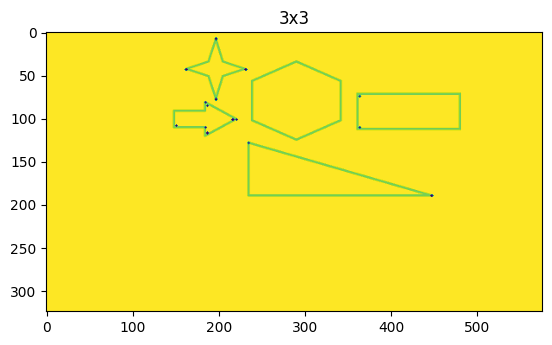

In [78]:
home = cv2.imread('/content/home.jpeg', cv2.IMREAD_GRAYSCALE)
corners = cv2.imread('/content/corners.png', cv2.IMREAD_GRAYSCALE)

blurred_corners = cv2.GaussianBlur(corners,(3,3), 0)

I_x = cv2.Sobel(blurred_corners, cv2.CV_16S, 1, 0, ksize=3)
I_y = cv2.Sobel(blurred_corners, cv2.CV_16S, 0, 1, ksize=3)
I_x_squared = np.square(I_x)
I_y_squared = np.square(I_y)
I_x_I_y = I_x * I_y


size = 3
start = int((size - 1) / 2)
k = 0.04
harris_response = np.zeros_like(corners, dtype=np.float32)


for x in range(start, blurred_corners.shape[1] - start):
  for y in range(start, blurred_corners.shape[0] - start):
    I_x_square_sum = np.sum(I_x_squared[y - start: y + start, x - start : x + start])
    I_y_square_sum = np.sum(I_y_squared[y - start: y + start, x - start : x + start])
    I_xy_square_sum = np.sum(I_x_I_y[y - start: y + start, x - start : x + start])

    det = (I_x_square_sum * I_y_square_sum) - (I_xy_square_sum ** 2)
    trace = I_x_square_sum + I_y_square_sum

    R = det - [(k * (trace **2))]
    harris_response[y, x] = R

threshold = 0.5 * harris_response.max()
corner_points_3 = np.where(harris_response > threshold)

corner_y, corner_x = corner_points_3

for i in range(len(corner_y)):
    y = corner_y[i]
    x = corner_x[i]
    cv2.circle(corners, (x, y), 1, (0, 255, 0), -1)

plt.imshow(corners)
plt.title("3x3")

#Changing the window size and observing the changes

Text(0.5, 1.0, '5x5')

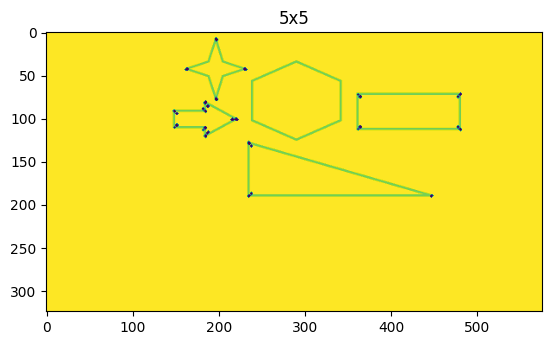

In [80]:
corners = cv2.imread('/content/corners.png', cv2.IMREAD_GRAYSCALE)

blurred_corners = cv2.GaussianBlur(corners,(3,3), 0)

I_x = cv2.Sobel(blurred_corners, cv2.CV_16S, 1, 0, ksize=3)
I_y = cv2.Sobel(blurred_corners, cv2.CV_16S, 0, 1, ksize=3)
I_x_squared = np.square(I_x)
I_y_squared = np.square(I_y)
I_x_I_y = I_x * I_y


size = 5
start = int((size - 1) / 2)
k = 0.04
harris_response = np.zeros_like(corners, dtype=np.float32)


for x in range(start, blurred_corners.shape[1] - start):
  for y in range(start, blurred_corners.shape[0] - start):
    I_x_square_sum = np.sum(I_x_squared[y - start: y + start, x - start : x + start])
    I_y_square_sum = np.sum(I_y_squared[y - start: y + start, x - start : x + start])
    I_xy_square_sum = np.sum(I_x_I_y[y - start: y + start, x - start : x + start])

    det = (I_x_square_sum * I_y_square_sum) - (I_xy_square_sum ** 2)
    trace = I_x_square_sum + I_y_square_sum

    R = det - [(k * (trace **2))]
    harris_response[y, x] = R

threshold = 0.5 * harris_response.max()
corner_points = np.where(harris_response > threshold)

corner_y, corner_x = corner_points

for i in range(len(corner_y)):
    y = corner_y[i]
    x = corner_x[i]
    cv2.circle(corners, (x, y), 1, (0, 255, 0), -1)

plt.imshow(corners)
plt.title("5x5")

Text(0.5, 1.0, '7x7')

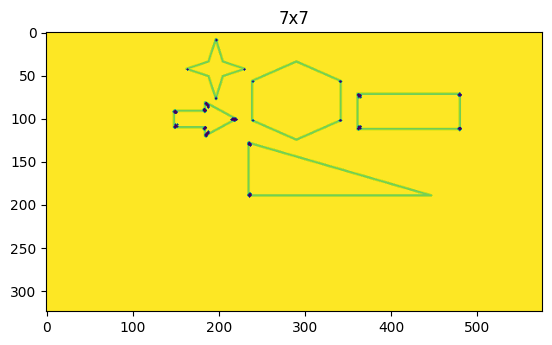

In [82]:
corners = cv2.imread('/content/corners.png', cv2.IMREAD_GRAYSCALE)

blurred_corners = cv2.GaussianBlur(corners,(3,3), 0)

I_x = cv2.Sobel(blurred_corners, cv2.CV_16S, 1, 0, ksize=3)
I_y = cv2.Sobel(blurred_corners, cv2.CV_16S, 0, 1, ksize=3)
I_x_squared = np.square(I_x)
I_y_squared = np.square(I_y)
I_x_I_y = I_x * I_y


size = 7
start = int((size - 1) / 2)
k = 0.04
harris_response = np.zeros_like(corners, dtype=np.float32)


for x in range(start, blurred_corners.shape[1] - start):
  for y in range(start, blurred_corners.shape[0] - start):
    I_x_square_sum = np.sum(I_x_squared[y - start: y + start, x - start : x + start])
    I_y_square_sum = np.sum(I_y_squared[y - start: y + start, x - start : x + start])
    I_xy_square_sum = np.sum(I_x_I_y[y - start: y + start, x - start : x + start])

    det = (I_x_square_sum * I_y_square_sum) - (I_xy_square_sum ** 2)
    trace = I_x_square_sum + I_y_square_sum

    R = det - [(k * (trace **2))]
    harris_response[y, x] = R

threshold = 0.5 * harris_response.max()
corner_points = np.where(harris_response > threshold)

corner_y, corner_x = corner_points

for i in range(len(corner_y)):
    y = corner_y[i]
    x = corner_x[i]
    cv2.circle(corners, (x, y), 1, (0, 255, 0), -1)

plt.imshow(corners)
plt.title("7x7")

Text(0.5, 1.0, '9x9')

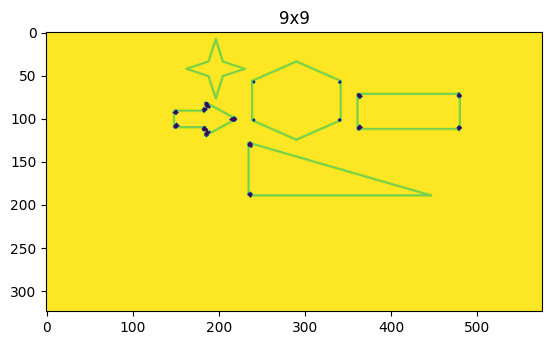

In [81]:
corners = cv2.imread('/content/corners.png', cv2.IMREAD_GRAYSCALE)

blurred_corners = cv2.GaussianBlur(corners,(3,3), 0)

I_x = cv2.Sobel(blurred_corners, cv2.CV_16S, 1, 0, ksize=3)
I_y = cv2.Sobel(blurred_corners, cv2.CV_16S, 0, 1, ksize=3)
I_x_squared = np.square(I_x)
I_y_squared = np.square(I_y)
I_x_I_y = I_x * I_y


size = 9
start = int((size - 1) / 2)
k = 0.04
harris_response = np.zeros_like(corners, dtype=np.float32)


for x in range(start, blurred_corners.shape[1] - start):
  for y in range(start, blurred_corners.shape[0] - start):
    I_x_square_sum = np.sum(I_x_squared[y - start: y + start, x - start : x + start])
    I_y_square_sum = np.sum(I_y_squared[y - start: y + start, x - start : x + start])
    I_xy_square_sum = np.sum(I_x_I_y[y - start: y + start, x - start : x + start])

    det = (I_x_square_sum * I_y_square_sum) - (I_xy_square_sum ** 2)
    trace = I_x_square_sum + I_y_square_sum

    R = det - [(k * (trace **2))]
    harris_response[y, x] = R

threshold = 0.5 * harris_response.max()
corner_points = np.where(harris_response > threshold)

corner_y, corner_x = corner_points

for i in range(len(corner_y)):
    y = corner_y[i]
    x = corner_x[i]
    cv2.circle(corners, (x, y), 1, (0, 255, 0), -1)

plt.imshow(corners)
plt.title("9x9")

Text(0.5, 1.0, '11x11')

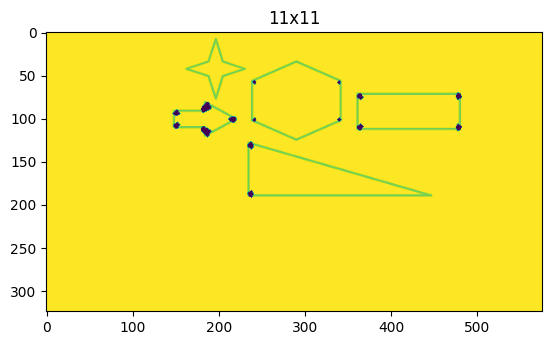

In [83]:
corners = cv2.imread('/content/corners.png', cv2.IMREAD_GRAYSCALE)

blurred_corners = cv2.GaussianBlur(corners,(3,3), 0)

I_x = cv2.Sobel(blurred_corners, cv2.CV_16S, 1, 0, ksize=3)
I_y = cv2.Sobel(blurred_corners, cv2.CV_16S, 0, 1, ksize=3)
I_x_squared = np.square(I_x)
I_y_squared = np.square(I_y)
I_x_I_y = I_x * I_y


size = 11
start = int((size - 1) / 2)
k = 0.04
harris_response = np.zeros_like(corners, dtype=np.float32)


for x in range(start, blurred_corners.shape[1] - start):
  for y in range(start, blurred_corners.shape[0] - start):
    I_x_square_sum = np.sum(I_x_squared[y - start: y + start, x - start : x + start])
    I_y_square_sum = np.sum(I_y_squared[y - start: y + start, x - start : x + start])
    I_xy_square_sum = np.sum(I_x_I_y[y - start: y + start, x - start : x + start])

    det = (I_x_square_sum * I_y_square_sum) - (I_xy_square_sum ** 2)
    trace = I_x_square_sum + I_y_square_sum

    R = det - [(k * (trace **2))]
    harris_response[y, x] = R

threshold = 0.5 * harris_response.max()
corner_points = np.where(harris_response > threshold)

corner_y, corner_x = corner_points

for i in range(len(corner_y)):
    y = corner_y[i]
    x = corner_x[i]
    cv2.circle(corners, (x, y), 1, (0, 255, 0), -1)

plt.imshow(corners)
plt.title("11x11")

#Changing the threshold

Text(0.5, 1.0, '3x3, threshold = 0.25')

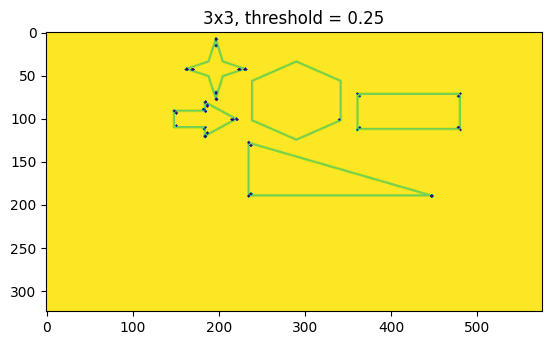

In [86]:
corners = cv2.imread('/content/corners.png', cv2.IMREAD_GRAYSCALE)

blurred_corners = cv2.GaussianBlur(corners,(3,3), 0)

I_x = cv2.Sobel(blurred_corners, cv2.CV_16S, 1, 0, ksize=3)
I_y = cv2.Sobel(blurred_corners, cv2.CV_16S, 0, 1, ksize=3)
I_x_squared = np.square(I_x)
I_y_squared = np.square(I_y)
I_x_I_y = I_x * I_y


size = 3
start = int((size - 1) / 2)
k = 0.04
harris_response = np.zeros_like(corners, dtype=np.float32)


for x in range(start, blurred_corners.shape[1] - start):
  for y in range(start, blurred_corners.shape[0] - start):
    I_x_square_sum = np.sum(I_x_squared[y - start: y + start, x - start : x + start])
    I_y_square_sum = np.sum(I_y_squared[y - start: y + start, x - start : x + start])
    I_xy_square_sum = np.sum(I_x_I_y[y - start: y + start, x - start : x + start])

    det = (I_x_square_sum * I_y_square_sum) - (I_xy_square_sum ** 2)
    trace = I_x_square_sum + I_y_square_sum

    R = det - [(k * (trace **2))]
    harris_response[y, x] = R

threshold = 0.25 * harris_response.max()
corner_points_3 = np.where(harris_response > threshold)

corner_y, corner_x = corner_points_3

for i in range(len(corner_y)):
    y = corner_y[i]
    x = corner_x[i]
    cv2.circle(corners, (x, y), 1, (0, 255, 0), -1)

plt.imshow(corners)
plt.title("3x3, threshold = 0.25")

Text(0.5, 1.0, '3x3, threshold = 0.125')

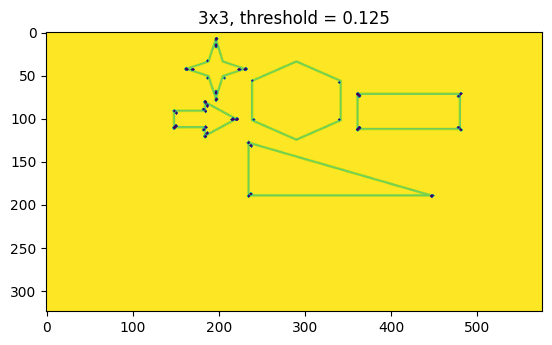

In [88]:
corners = cv2.imread('/content/corners.png', cv2.IMREAD_GRAYSCALE)

blurred_corners = cv2.GaussianBlur(corners,(3,3), 0)

I_x = cv2.Sobel(blurred_corners, cv2.CV_16S, 1, 0, ksize=3)
I_y = cv2.Sobel(blurred_corners, cv2.CV_16S, 0, 1, ksize=3)
I_x_squared = np.square(I_x)
I_y_squared = np.square(I_y)
I_x_I_y = I_x * I_y


size = 3
start = int((size - 1) / 2)
k = 0.04
harris_response = np.zeros_like(corners, dtype=np.float32)


for x in range(start, blurred_corners.shape[1] - start):
  for y in range(start, blurred_corners.shape[0] - start):
    I_x_square_sum = np.sum(I_x_squared[y - start: y + start, x - start : x + start])
    I_y_square_sum = np.sum(I_y_squared[y - start: y + start, x - start : x + start])
    I_xy_square_sum = np.sum(I_x_I_y[y - start: y + start, x - start : x + start])

    det = (I_x_square_sum * I_y_square_sum) - (I_xy_square_sum ** 2)
    trace = I_x_square_sum + I_y_square_sum

    R = det - [(k * (trace **2))]
    harris_response[y, x] = R

threshold = 0.125 * harris_response.max()
corner_points_3 = np.where(harris_response > threshold)

corner_y, corner_x = corner_points_3

for i in range(len(corner_y)):
    y = corner_y[i]
    x = corner_x[i]
    cv2.circle(corners, (x, y), 1, (0, 255, 0), -1)

plt.imshow(corners)
plt.title("3x3, threshold = 0.125")

#Conclusion

Harris Corner Detector is used to detect the corners of the given image for the threshold of 50 percent of the maximum value of Harris Response and window size =  3x3

Observations
* If Window size is increased to 5x5 then corner detector detects broader corners and not sharp corners, since the window size increased. This shows that If size of the corner is increased, then size of window should be larger than the size of corner in order to detect it.
* If threshold is reduced then more corners are detected.

In [89]:
%%shell

jupyter nbconvert --to html /content/Harris_Corner_Detector.ipynb

[NbConvertApp] Converting notebook /content/Harris_Corner_Detector.ipynb to html
[NbConvertApp] Writing 1942019 bytes to /content/Harris_Corner_Detector.html
